In [969]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Preparation

In [970]:
weather = pd.read_csv('data/weather_data.csv')
bike = pd.read_csv('data/citibike.csv')

In [971]:
weather.shape, bike.shape

((4138, 12), (4129, 2))

In [972]:
weather['date'] = pd.to_datetime(weather['date']).dt.date
bike['day'] = pd.to_datetime(bike['day']).dt.date

# Perform the join
merged_df = pd.merge(weather, bike, left_on='date', right_on='day', how='inner')

merged_df = merged_df.drop(columns=['day'])

In [973]:
df = merged_df.copy()
df.head(5)

,date,temperature_2m_mean,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,cloud_cover_mean,relative_humidity_2m_mean,daylight_duration,number_of_trips
0,2014-01-01,-2.518584,-7.199565,0.0,0.0,0.00,0.0,15.038350,29.519999,44.375000,51.803543,33542.426,6059
1,2014-01-02,-2.631083,-8.301644,3.9,0.0,2.94,8.0,23.132626,46.800000,99.500000,75.030980,33587.008,8600
2,2014-01-03,-12.143584,-18.867376,10.1,0.0,7.14,11.0,28.766228,54.360000,54.250000,68.411960,33635.184,1144
3,2014-01-04,-13.076917,-17.824211,0.0,0.0,0.00,0.0,11.983188,17.640000,28.041666,69.838005,33686.910,2292
4,2014-01-05,-3.895666,-7.867000,0.1,0.1,0.00,1.0,15.192682,28.440000,71.750000,86.027750,33742.355,2678


In [974]:
# create a new column for the day of the week as number 
df['weekday'] = df['date'].apply(lambda x: x.weekday())

In [975]:
# create a new column for categorical year and season

df['date'] = pd.to_datetime(df['date'])

years = df['date'].dt.year
df['year'] = pd.factorize(years)[0]

df['season'] = (df['date'].dt.month % 12 // 3) + 1

In [976]:
import holidays

us_holidays = holidays.US()

df['is_holiday'] = df['date'].dt.date.apply(lambda d: 1 if d in us_holidays else 0)

In [977]:
# Creating lag features
df["lag_1"] = df["number_of_trips"].shift(1)
df["lag_7"] = df["number_of_trips"].shift(7)
df["lag_30"] = df["number_of_trips"].shift(30)


# Create rolling averages and lag 
df["rolling_7_mean"] = df["number_of_trips"].rolling(window=7).mean()
df["rolling_30_mean"] = df["number_of_trips"].rolling(window=30).mean()

In [978]:
df

,date,temperature_2m_mean,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,cloud_cover_mean,...,number_of_trips,weekday,year,season,is_holiday,lag_1,lag_7,lag_30,rolling_7_mean,rolling_30_mean
0,2014-01-01,-2.518584,-7.199565,0.000000,0.000000,0.00,0.0,15.038350,29.519999,44.375000,...,6059,2,0,1,1,NaN,NaN,NaN,NaN,NaN
1,2014-01-02,-2.631083,-8.301644,3.900000,0.000000,2.94,8.0,23.132626,46.800000,99.500000,...,8600,3,0,1,0,6059.0,NaN,NaN,NaN,NaN
2,2014-01-03,-12.143584,-18.867376,10.100000,0.000000,7.14,11.0,28.766228,54.360000,54.250000,...,1144,4,0,1,0,8600.0,NaN,NaN,NaN,NaN
3,2014-01-04,-13.076917,-17.824211,0.000000,0.000000,0.00,0.0,11.983188,17.640000,28.041666,...,2292,5,0,1,0,1144.0,NaN,NaN,NaN,NaN
4,2014-01-05,-3.895666,-7.867000,0.100000,0.100000,0.00,1.0,15.192682,28.440000,71.750000,...,2678,6,0,1,0,2292.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124,2025-04-26,18.251663,17.817745,13.200001,13.200001,0.00,18.0,21.396542,48.239998,93.791664,...,129606,5,11,2,0,168961.0,155757.0,115806.0,146727.428571,118635.933333
4125,2025-04-27,11.524585,6.710212,0.000000,0.000000,0.00,0.0,30.356560,77.039990,51.958332,...,121701,6,11,2,0,129606.0,117664.0,121484.0,147304.142857,118643.166667
4126,2025-04-28,15.799582,13.341233,0.000000,0.000000,0.00,0.0,12.678185,32.760002,8.708333,...,152958,0,11,2,0,121701.0,116298.0,143550.0,152541.285714,118956.766667
4127,2025-04-29,19.270414,17.037094,0.000000,0.000000,0.00,0.0,19.334715,45.000000,56.416668,...,169718,1,11,2,0,152958.0,158681.0,87163.0,154118.000000,121708.600000


# 2. Exploratory Data Analysis

In [979]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4129 entries, 0 to 4128
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       4129 non-null   datetime64[ns]
 1   temperature_2m_mean        4129 non-null   float64       
 2   apparent_temperature_mean  4129 non-null   float64       
 3   precipitation_sum          4129 non-null   float64       
 4   rain_sum                   4129 non-null   float64       
 5   snowfall_sum               4129 non-null   float64       
 6   precipitation_hours        4129 non-null   float64       
 7   wind_speed_10m_max         4129 non-null   float64       
 8   wind_gusts_10m_max         4129 non-null   float64       
 9   cloud_cover_mean           4129 non-null   float64       
 10  relative_humidity_2m_mean  4129 non-null   float64       
 11  daylight_duration          4129 non-null   float64       
 12  number

In [980]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
date                          0
temperature_2m_mean           0
apparent_temperature_mean     0
precipitation_sum             0
rain_sum                      0
snowfall_sum                  0
precipitation_hours           0
wind_speed_10m_max            0
wind_gusts_10m_max            0
cloud_cover_mean              0
relative_humidity_2m_mean     0
daylight_duration             0
number_of_trips               0
weekday                       0
year                          0
season                        0
is_holiday                    0
lag_1                         1
lag_7                         7
lag_30                       30
rolling_7_mean                6
rolling_30_mean              29
dtype: int64


min: 180 max: 198231 mean: 65926.91474933398 std: 41521.96863028764


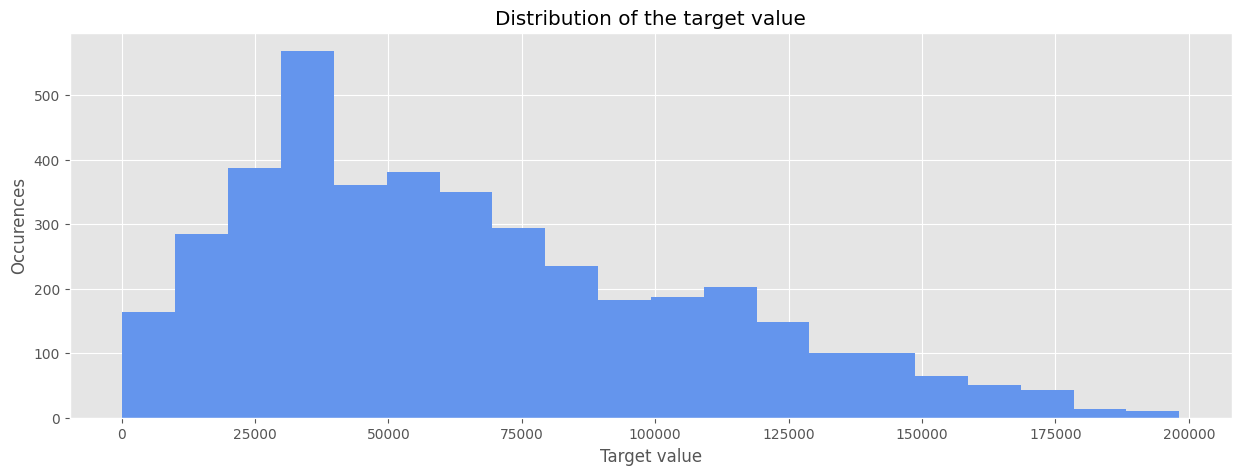

In [981]:
plt.figure(figsize=(15, 5))
plt.hist(df["number_of_trips"], bins=20, color='cornflowerblue')
plt.xlabel('Target value')
plt.ylabel('Occurences')
plt.title('Distribution of the target value')

print('min: {} max: {} mean: {} std: {}'.format(min(df["number_of_trips"]), max(df["number_of_trips"]), df["number_of_trips"].mean(), df["number_of_trips"].std()))

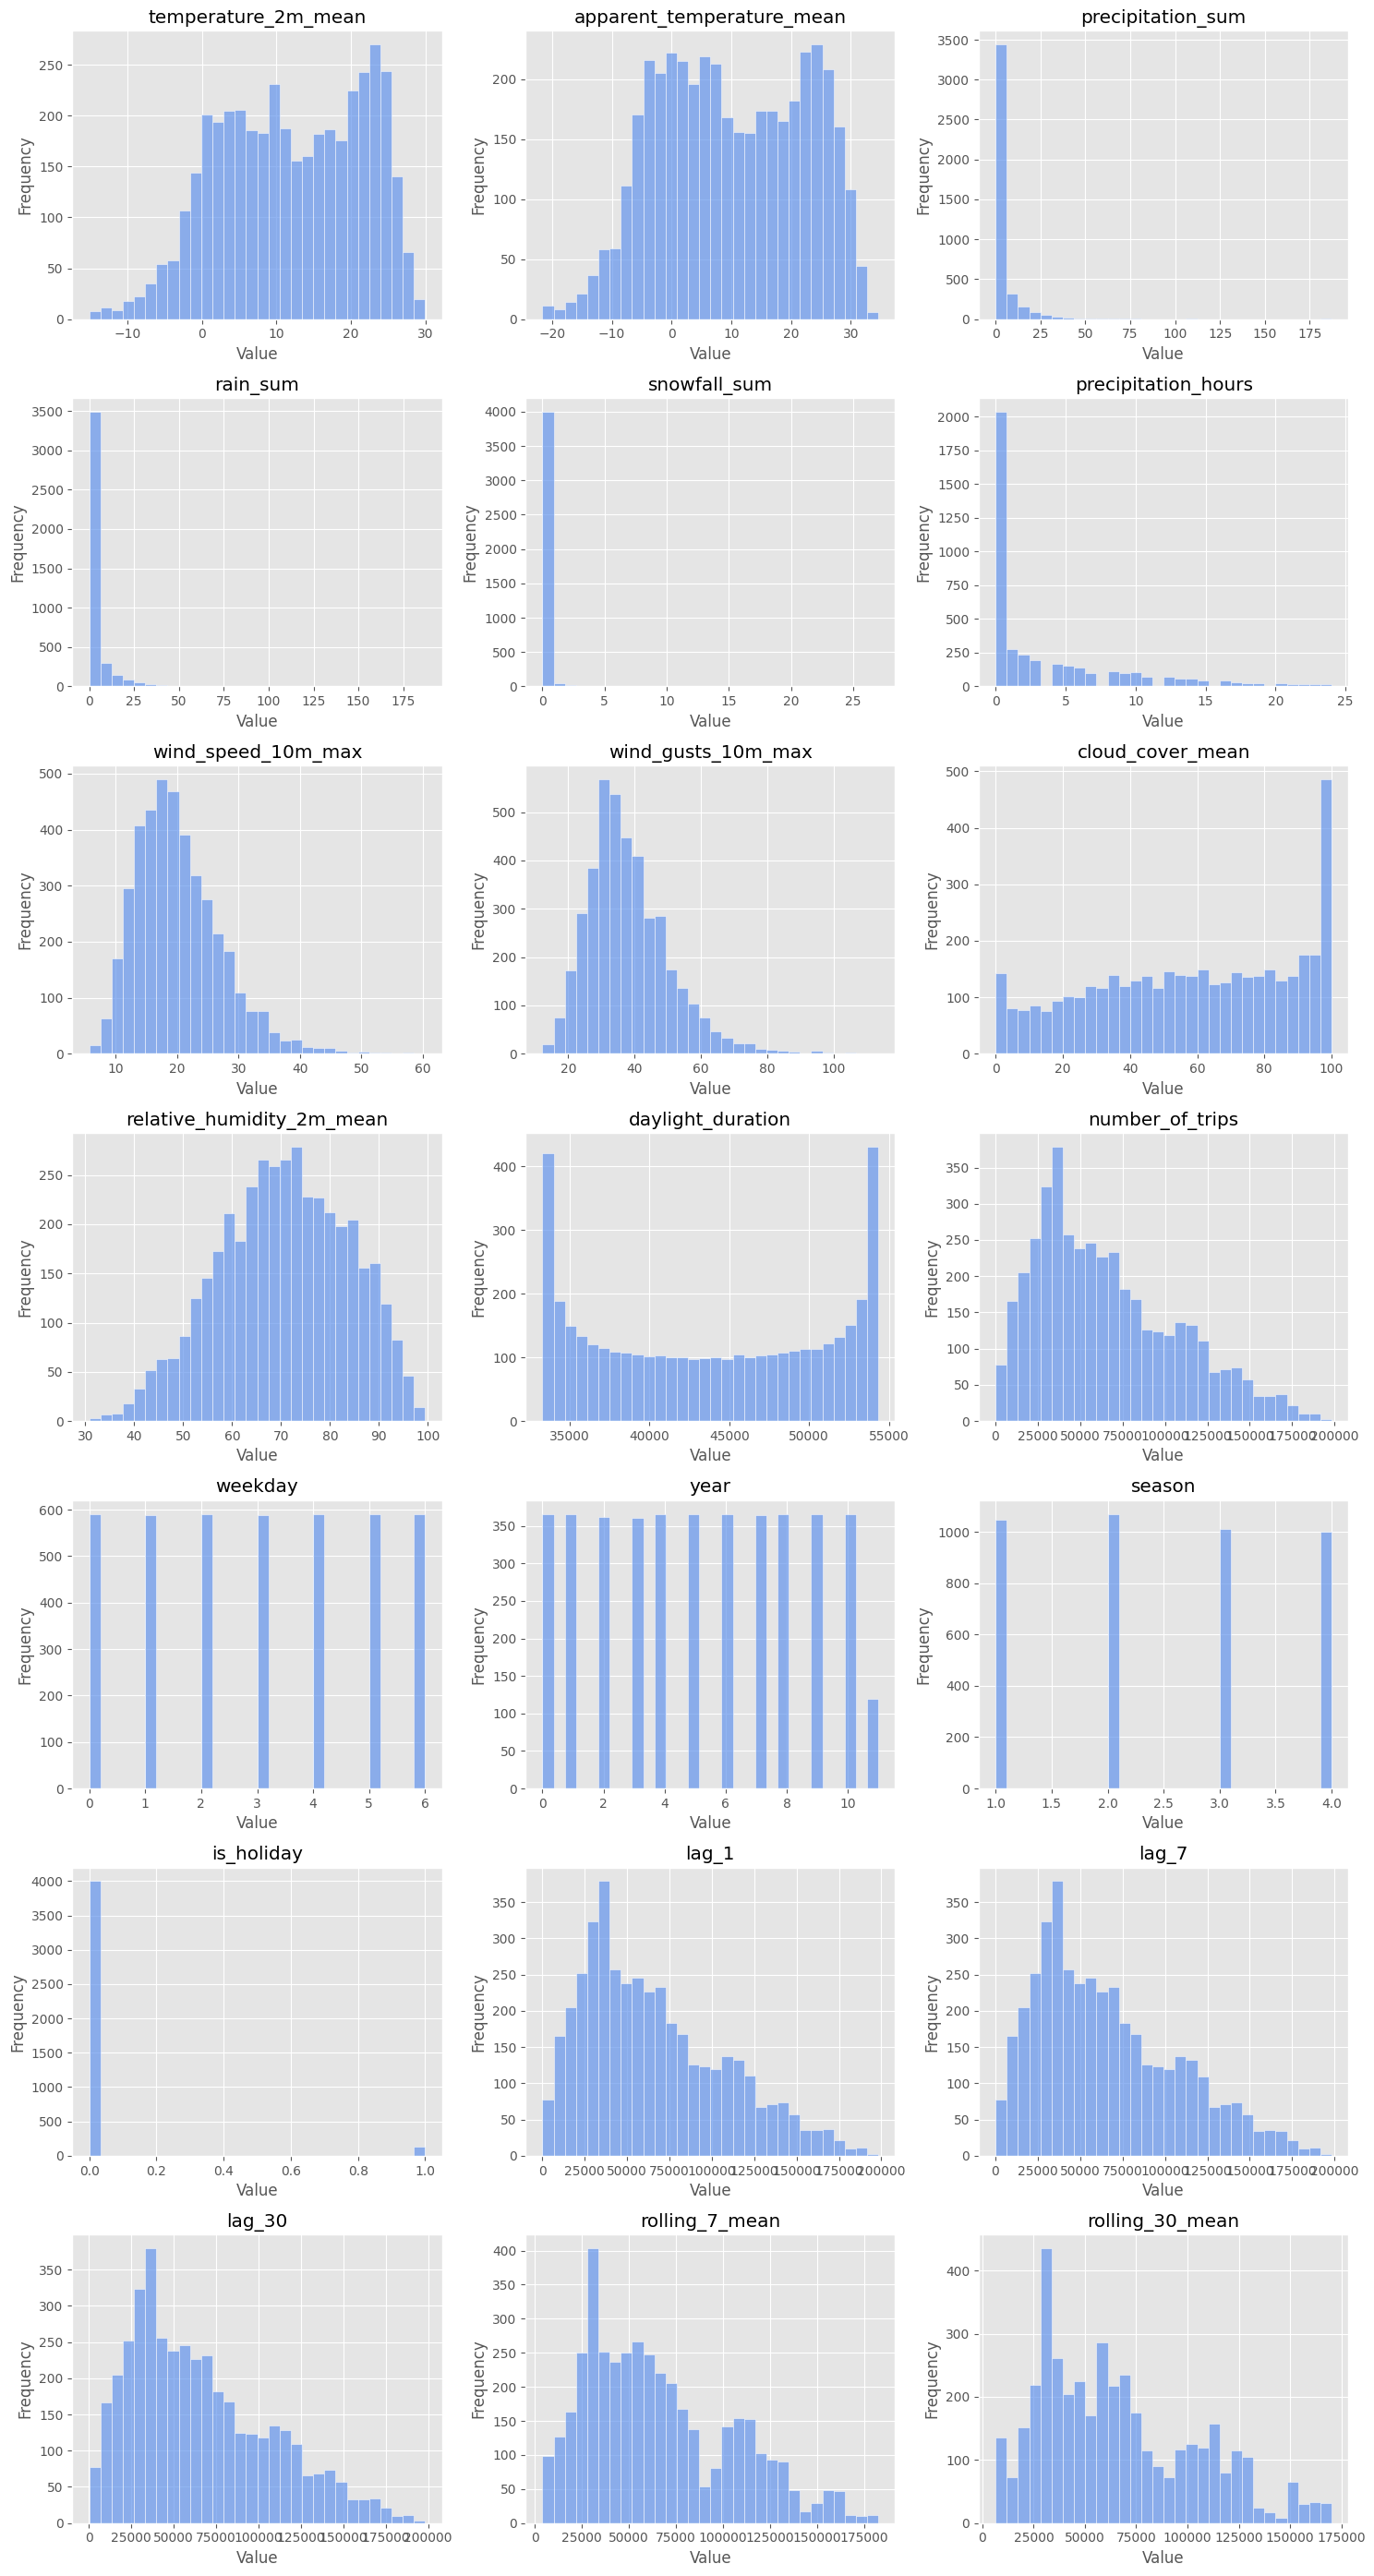

In [982]:
import pandas as pd
import matplotlib.pyplot as plt

# Apply ggplot style
plt.style.use('ggplot')

# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Set grid size
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col].dropna(),  bins=30, color = "cornflowerblue",edgecolor='white', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Turn off empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show();

In [983]:
df.columns

Index(['date', 'temperature_2m_mean', 'apparent_temperature_mean',
       'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours',
       'wind_speed_10m_max', 'wind_gusts_10m_max', 'cloud_cover_mean',
       'relative_humidity_2m_mean', 'daylight_duration', 'number_of_trips',
       'weekday', 'year', 'season', 'is_holiday', 'lag_1', 'lag_7', 'lag_30',
       'rolling_7_mean', 'rolling_30_mean'],
      dtype='object')

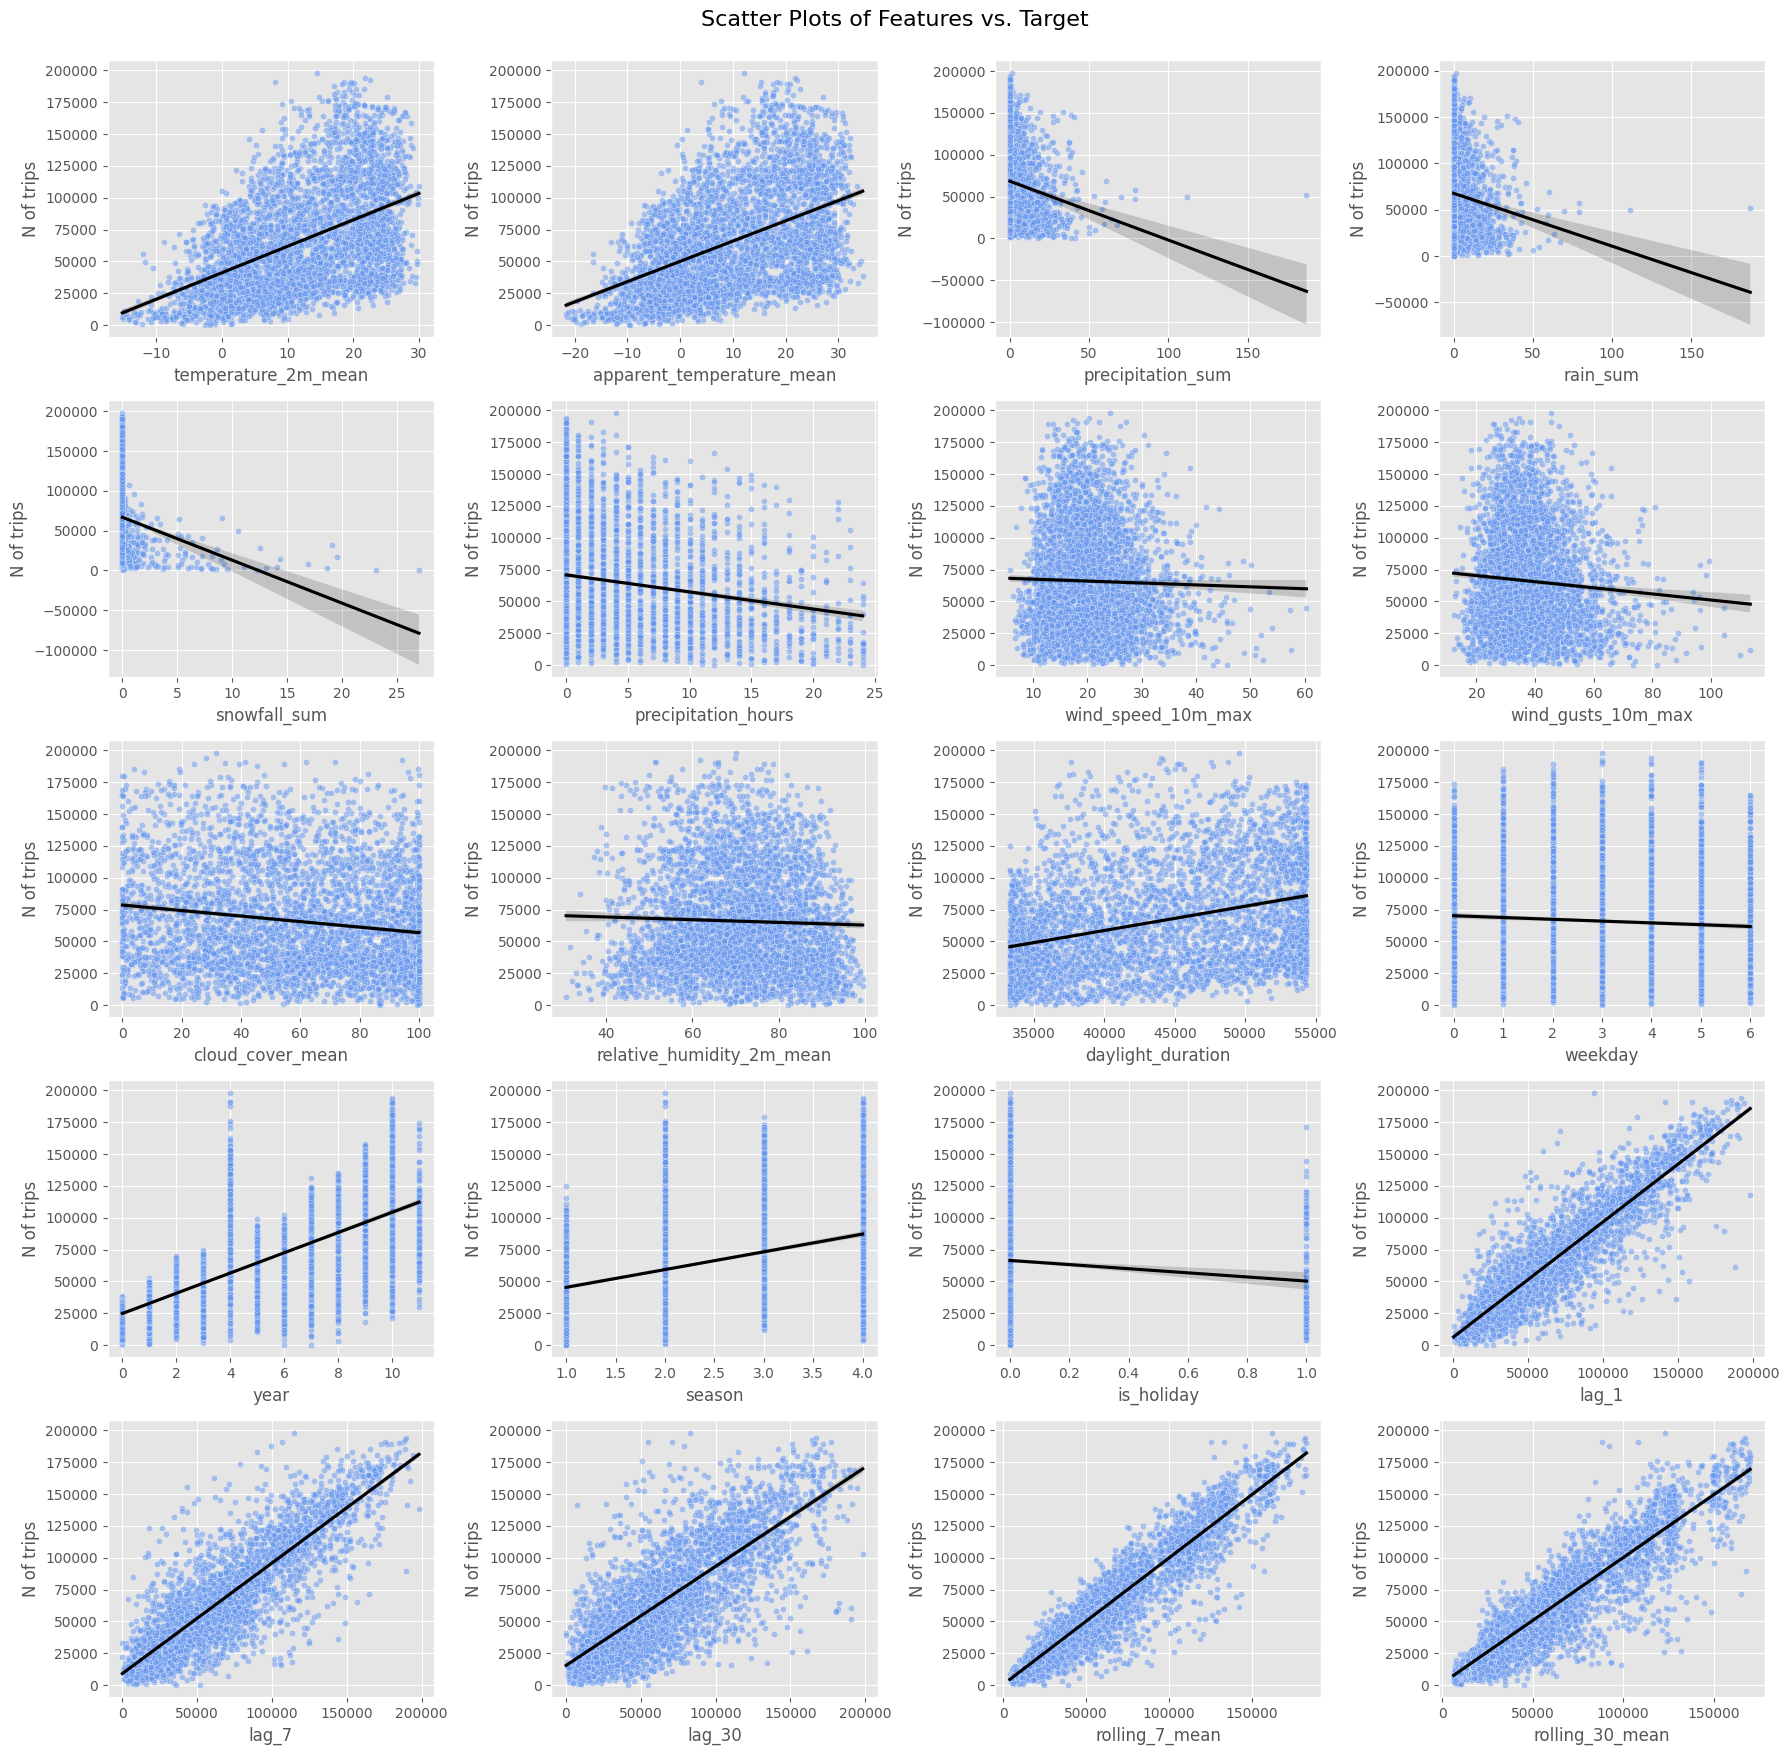

In [984]:
plt.style.use("ggplot")

target = "number_of_trips"
features = df.columns.drop(["date", target])

n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 3.5))

for idx, feature in enumerate(features):
    row, col = divmod(idx, n_cols)
    ax = axes[row, col]

    # Scatter plot with blue points
    sns.scatterplot(data=df, x=feature, y=target, ax=ax, alpha=0.5, s=20, color='cornflowerblue')
    sns.regplot(data=df, x=feature, y=target, ax=ax, scatter=False, color='black')

    # Title format: "feature)"
    ax.set_xlabel(feature)
    ax.set_ylabel("N of trips")

# Remove empty subplots
for idx in range(len(features), n_rows * n_cols):
    fig.delaxes(axes.flatten()[idx])

fig.suptitle("Scatter Plots of Features vs. Target", fontsize=16, y=1)

plt.tight_layout()
plt.show()

In [985]:
df.drop(columns=["date", "number_of_trips"]).corrwith(df["number_of_trips"])

temperature_2m_mean          0.479298
apparent_temperature_mean    0.464846
precipitation_sum           -0.138781
rain_sum                    -0.110232
snowfall_sum                -0.153038
precipitation_hours         -0.174541
wind_speed_10m_max          -0.025441
wind_gusts_10m_max          -0.072204
cloud_cover_mean            -0.156165
relative_humidity_2m_mean   -0.033773
daylight_duration            0.329882
weekday                     -0.067983
year                         0.626975
season                       0.374314
is_holiday                  -0.068358
lag_1                        0.904447
lag_7                        0.866771
lag_30                       0.777083
rolling_7_mean               0.935290
rolling_30_mean              0.905144
dtype: float64

As there are correlations between the features, we can use use linear methods to predict the target variable. 

In [986]:
cols = [
    "temperature_2m_mean",
    "apparent_temperature_mean",
    "precipitation_sum",
    "rain_sum",
    "snowfall_sum",
    "precipitation_hours",
    "wind_speed_10m_max",
    "wind_gusts_10m_max",
    "cloud_cover_mean",
    "relative_humidity_2m_mean",
    "daylight_duration"
]

corr = df.loc[:, cols].corr()
corr

,temperature_2m_mean,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,cloud_cover_mean,relative_humidity_2m_mean,daylight_duration
temperature_2m_mean,1.000000,0.994995,0.054651,0.094429,-0.186254,0.047766,-0.138824,-0.118504,0.046582,0.250256,0.748676
apparent_temperature_mean,0.994995,1.000000,0.060976,0.100371,-0.183587,0.064395,-0.195843,-0.170752,0.067389,0.298334,0.743276
precipitation_sum,0.054651,0.060976,1.000000,0.978782,0.208291,0.736240,0.285039,0.327926,0.383915,0.451577,0.016483
rain_sum,0.094429,0.100371,0.978782,1.000000,0.003485,0.700357,0.267422,0.314225,0.366181,0.446941,0.040631
snowfall_sum,-0.186254,-0.183587,0.208291,0.003485,1.000000,0.250715,0.114259,0.100379,0.126691,0.070237,-0.114585
precipitation_hours,0.047766,0.064395,0.736240,0.700357,0.250715,1.000000,0.229622,0.269905,0.575779,0.617613,0.025947
wind_speed_10m_max,-0.138824,-0.195843,0.285039,0.267422,0.114259,0.229622,1.000000,0.937936,0.033284,-0.126668,-0.079055
wind_gusts_10m_max,-0.118504,-0.170752,0.327926,0.314225,0.100379,0.269905,0.937936,1.000000,0.059533,-0.095857,-0.051192
cloud_cover_mean,0.046582,0.067389,0.383915,0.366181,0.126691,0.575779,0.033284,0.059533,1.000000,0.582670,0.022834
relative_humidity_2m_mean,0.250256,0.298334,0.451577,0.446941,0.070237,0.617613,-0.126668,-0.095857,0.582670,1.000000,0.035571


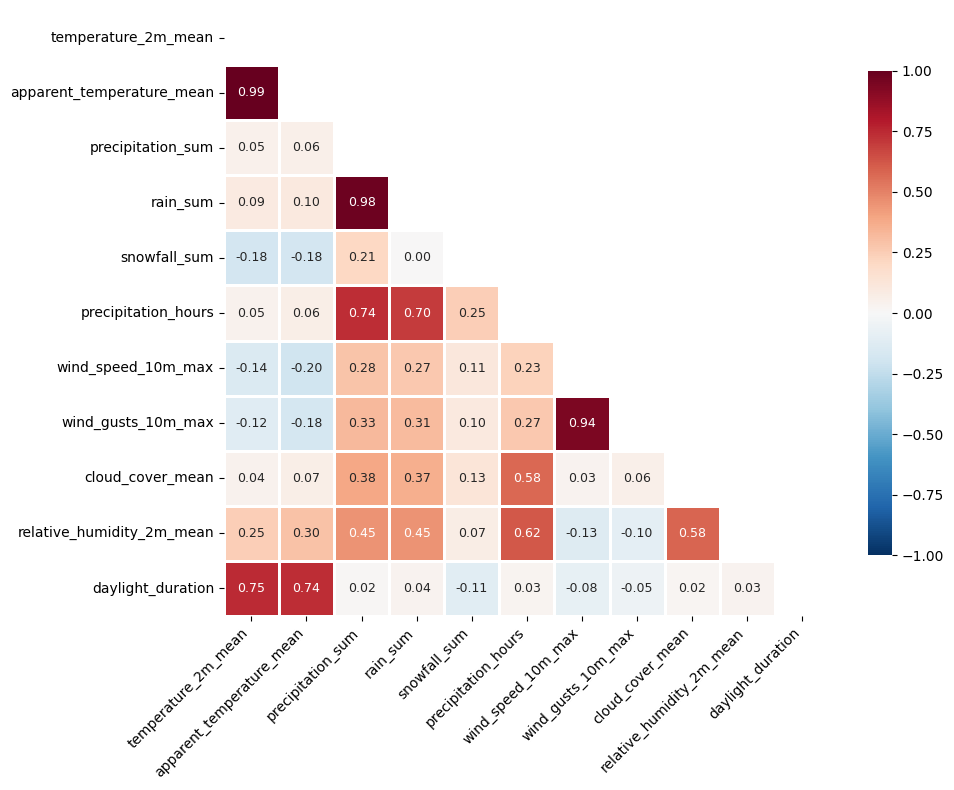

In [987]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.style.use('default')

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap="RdBu_r",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 9},
    square=True,
    linewidths=0.75,
    cbar_kws={"shrink": 0.8},
    vmin=-1, vmax=1,
    ax=ax
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
#plt.title("Correlation Matrix of Weather Features", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

However, it's important that we consider multicollinearity of some of the features, specifically ```temperature_2m_mean``` and ```apparent_temperature_mean```; ```precipitation_sum```,```rain_sum``` and ```snowfall_sum```. 

# 3. Linear regression

In [988]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [989]:
df.mean()

date                         2019-09-02 12:39:35.006054656
temperature_2m_mean                              11.961784
apparent_temperature_mean                         9.998788
precipitation_sum                                 3.439961
rain_sum                                          3.213805
snowfall_sum                                       0.16031
precipitation_hours                               3.664083
wind_speed_10m_max                               20.236946
wind_gusts_10m_max                                38.08371
cloud_cover_mean                                 58.236649
relative_humidity_2m_mean                        70.498794
daylight_duration                             43866.123768
number_of_trips                               65926.914749
weekday                                           3.000969
year                                              5.179462
season                                            2.476629
is_holiday                                        0.0317

In [990]:
missing_counts = df.isna().sum()

# Display only columns with missing values
missing_counts[missing_counts > 0]

lag_1               1
lag_7               7
lag_30             30
rolling_7_mean      6
rolling_30_mean    29
dtype: int64

In [991]:
df = df.dropna(subset=["lag_1", "lag_7", "lag_30", "rolling_7_mean", "rolling_30_mean"])

As features have different scales, it's better to scale the features, as well as transform categorical features using one-hot encoding. 

In [992]:
X = df.drop(columns=['date', "number_of_trips"])
y = df["number_of_trips"]

In [993]:
categorical_features = ['weekday', 'season']
numeric_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
pipeline.fit(X_train, y_train)

model = pipeline.named_steps['regressor']

In [994]:
# Get feature names after one-hot encoding and scaling
feature_names = pipeline.named_steps['preprocessing'].get_feature_names_out()

# Combine with coefficients
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": model.coef_
})

coef_df = coef_df.sort_values(by="coefficient", key=abs, ascending=False)
print(coef_df)

                           feature    coefficient
2           num__precipitation_sum -126749.078053
3                    num__rain_sum  119552.415786
4                num__snowfall_sum   30432.548021
16             num__rolling_7_mean   22258.255184
0         num__temperature_2m_mean   17168.960245
1   num__apparent_temperature_mean  -14613.449848
23                  cat__weekday_6   -7876.995314
26                   cat__season_4   -6341.371544
25                   cat__season_3   -5330.924951
5         num__precipitation_hours   -4727.492698
17            num__rolling_30_mean    3985.804039
22                  cat__weekday_5   -3722.064405
13                      num__lag_1    3504.285361
9   num__relative_humidity_2m_mean    2438.415809
14                      num__lag_7    2099.520890
19                  cat__weekday_2    2050.956016
6          num__wind_speed_10m_max   -1826.392410
18                  cat__weekday_1    1705.339498
8            num__cloud_cover_mean   -1628.742741


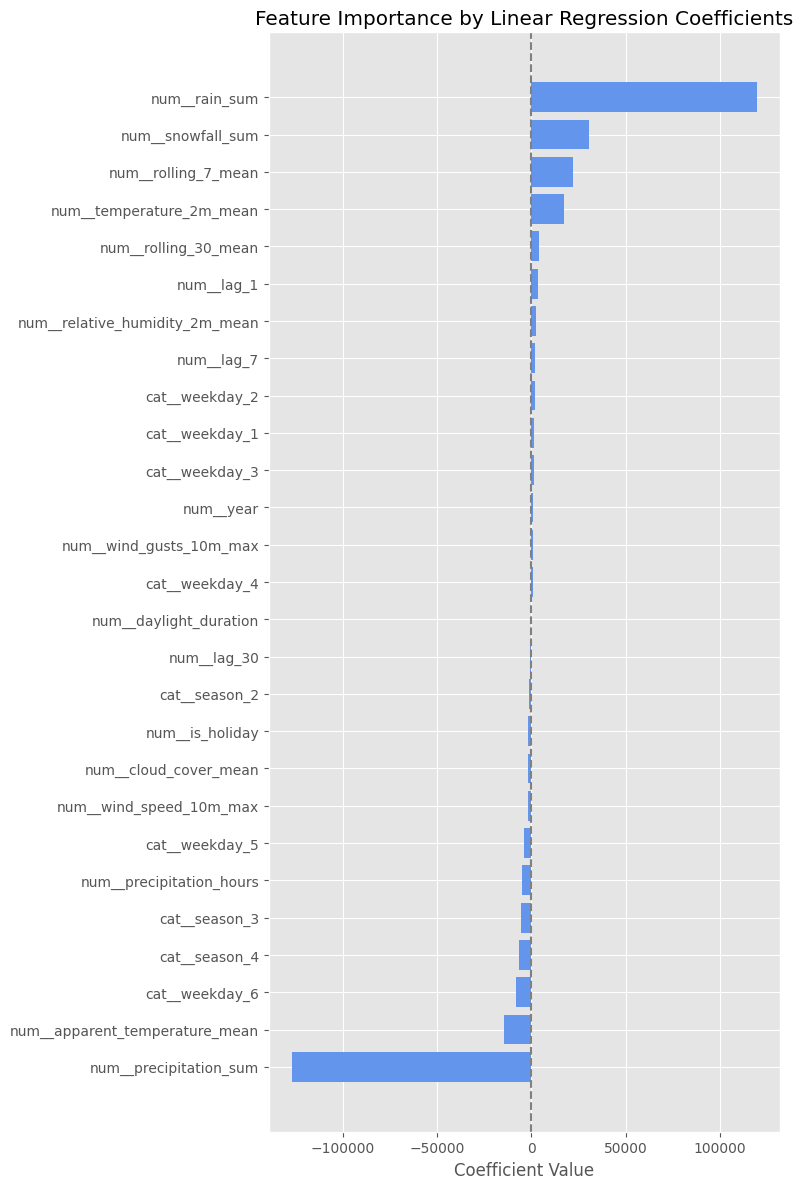

In [995]:
coef_df = coef_df.sort_values(by="coefficient", ascending=True)

plt.style.use('ggplot')
# Set the figure size
plt.figure(figsize=(8, 12))
plt.barh(coef_df["feature"], coef_df["coefficient"], color="cornflowerblue")
plt.axvline(x=0, color="gray", linestyle="--")
plt.title("Feature Importance by Linear Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

We see the importance of the features in the model. The most important features are the lagged values and the rolling means, which are expected to be important for time series data. The weather-related features also have a significant impact, with temperature and precipitation being the most influential. However, there are also signs of multicollinearity, therefore regularization is needed.  

In [996]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)

MAE: 9883.794690376182
MSE: 178528851.14951545
R²: 0.8894052907087462


In [997]:
from sklearn.linear_model import Ridge, Lasso

In [998]:
# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False)
X_cat_encoded = encoder.fit_transform(X[categorical_features])
cat_feature_names = encoder.get_feature_names_out(categorical_features)

# Scale numeric features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[numeric_features])

# Combine
X_processed = np.hstack([X_num_scaled, X_cat_encoded])
feature_names = numeric_features + list(cat_feature_names)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, shuffle=False, random_state=42)

# Fit Lasso regression
lasso_model = Lasso(max_iter=10000)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

In [999]:
# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Coefficients
lasso_coef = pd.Series(lasso_model.coef_, index=feature_names).sort_values(ascending=False)

mae, mse, r2

(9905.34251447336, 179183191.2877104, 0.8889999413386286)

In [1000]:
lasso_coef

rolling_7_mean               27702.305580
temperature_2m_mean          15622.707366
season_1                      5108.899233
rolling_30_mean               4799.379405
lag_1                         4322.925138
season_2                      3814.703956
lag_7                         2583.671905
relative_humidity_2m_mean     2396.857530
weekday_2                     1341.872664
year                          1210.089874
weekday_1                     1007.298403
weekday_3                      840.631702
wind_gusts_10m_max             816.781338
snowfall_sum                   104.848496
rain_sum                         0.000000
weekday_4                        0.000000
season_3                      -245.578464
daylight_duration             -270.515649
lag_30                        -634.848122
weekday_0                     -653.097872
season_4                     -1158.805182
is_holiday                   -1573.194470
cloud_cover_mean             -1608.058454
wind_speed_10m_max           -1748

We see one of the features that was causing multicollinearity ```rain_sum``` is set to 0, as well as ```weekday_4``` which is uninformative.

In [1001]:
# Fit Lasso regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [1002]:
# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Coefficients
ridge_coef = pd.Series(ridge_model.coef_, index=feature_names).sort_values(ascending=False)

mae, mse, r2

(9907.041080548133, 179177774.8532057, 0.8890032967010564)

In [1003]:
ridge_coef

rolling_7_mean               27356.500710
temperature_2m_mean          13855.093370
rolling_30_mean               4995.308430
lag_1                         4430.886432
season_1                      3215.216468
weekday_2                     2814.696995
lag_7                         2622.884792
weekday_1                     2491.200511
weekday_3                     2315.389008
relative_humidity_2m_mean     2300.677643
season_2                      2012.518628
weekday_4                     1483.429130
year                          1213.941385
weekday_0                      861.954675
wind_gusts_10m_max             833.524736
rain_sum                       472.371100
snowfall_sum                   205.348184
daylight_duration             -289.566782
lag_30                        -652.587454
is_holiday                   -1578.600119
cloud_cover_mean             -1600.424510
wind_speed_10m_max           -1661.615478
season_3                     -2219.810173
weekday_5                    -2922

In [1004]:
alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

In [1005]:
i = 0
for i in range(len(alphas)):
    model = Lasso(alpha=alphas[i], max_iter=10000)
    model.fit(X,y)
    coefs_lasso[i] = model.coef_
    i +=1

x = 0
for x in range(len(alphas)):
    model = Ridge(alpha=alphas[x], max_iter=10000)
    model.fit(X,y)
    coefs_ridge[x] = model.coef_
    x +=1

/opt/miniconda3/envs/default_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.107e+11, tolerance: 7.020e+08
  model = cd_fast.enet_coordinate_descent(


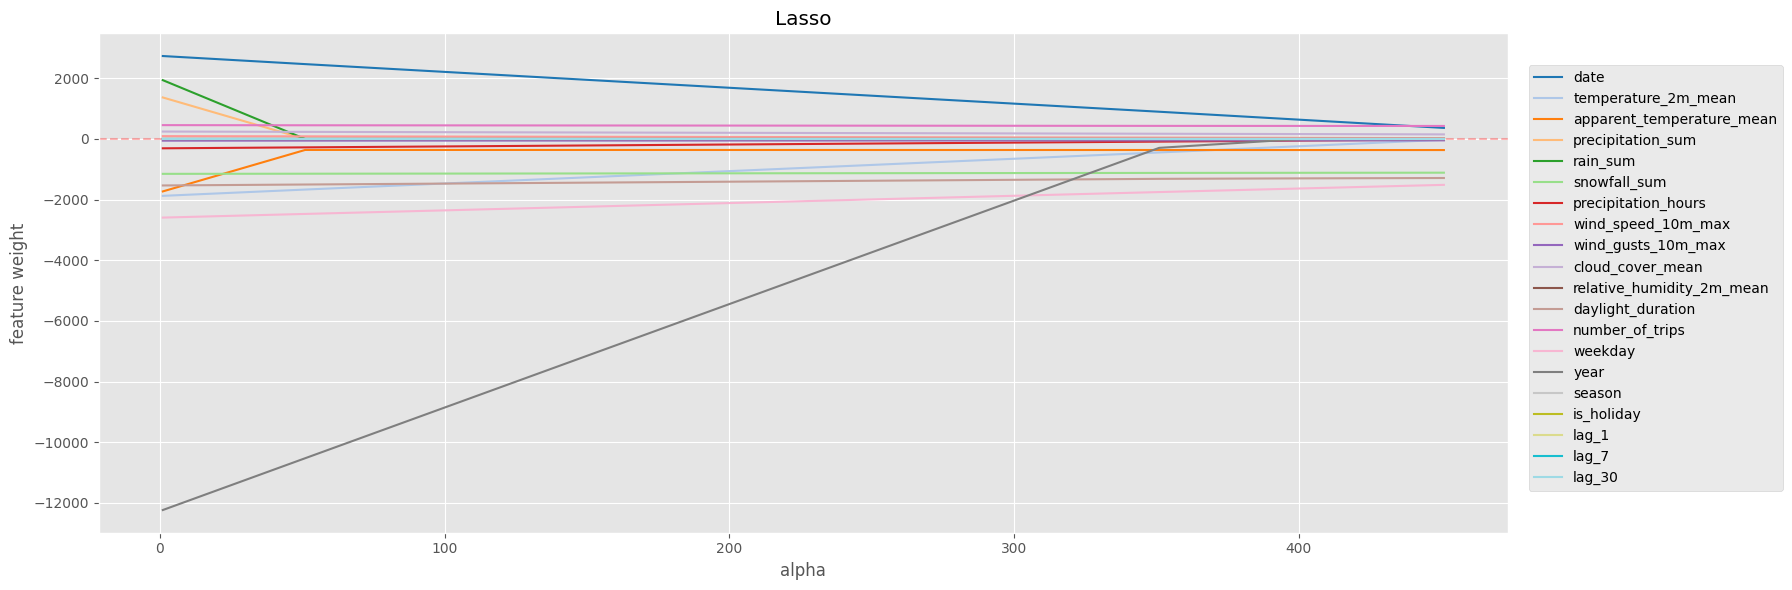

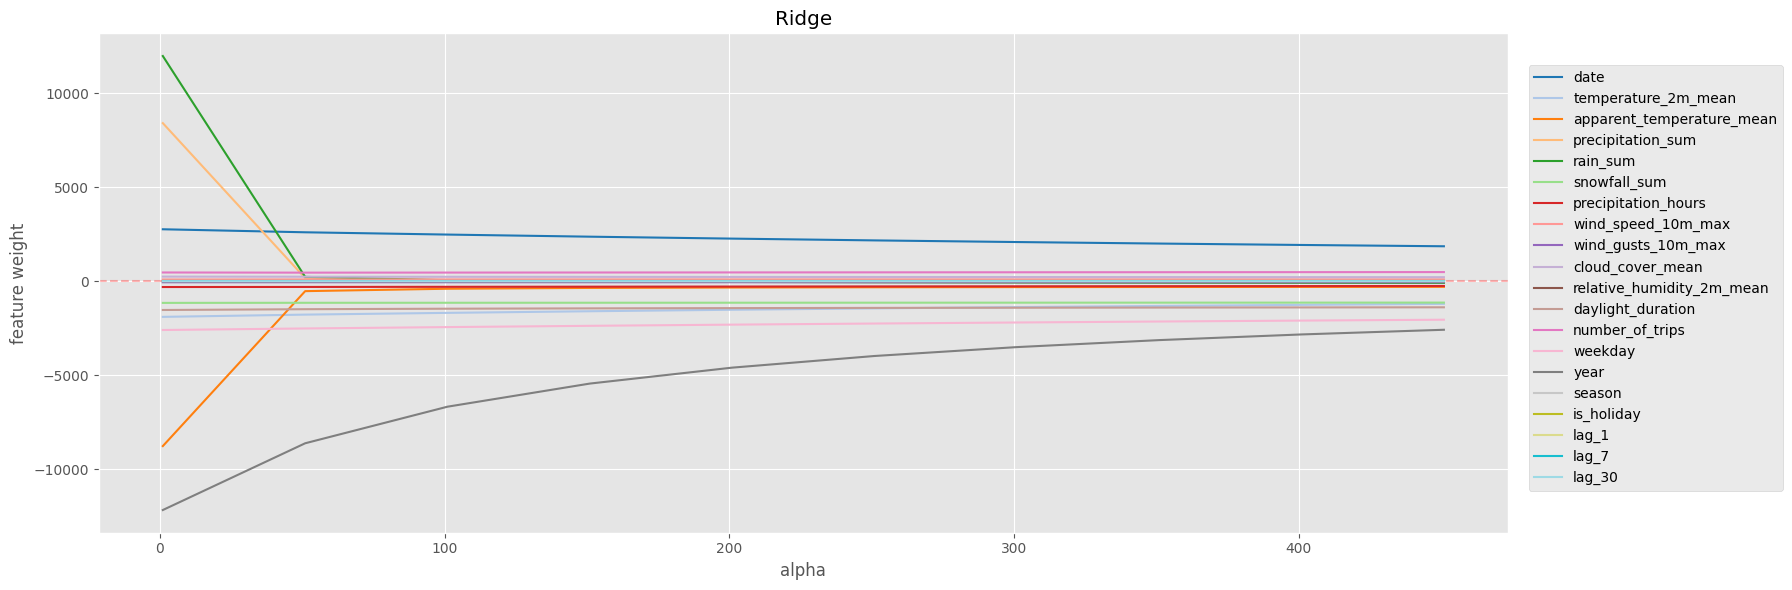

In [1006]:
cmap = plt.get_cmap('tab20', X.shape[1])  # Get N distinct colors from 'tab20'
colors = [cmap(i) for i in range(X.shape[1])]

# Lasso Plot
plt.figure(figsize=(18, 6))
plt.axhline(y=0, c='r', linestyle='--', alpha=.3)
for i, (coef, feature) in enumerate(zip(coefs_lasso.T, df.columns)):
    plt.plot(alphas, coef, label=feature, color=colors[i])
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 0.95), fontsize=10)
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")
plt.tight_layout()

# Ridge Plot
plt.figure(figsize=(18, 6))
plt.axhline(y=0, c='r', linestyle='--', alpha=.3)
for i, (coef, feature) in enumerate(zip(coefs_ridge.T, df.columns)):
    plt.plot(alphas, coef, label=feature, color=colors[i])
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 0.95), fontsize=10)
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")
plt.tight_layout()

plt.show();


In [1007]:
lasso_model = Ridge(alpha= 400, max_iter=10000)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

lasso_coef = pd.Series(lasso_model.coef_, index=feature_names).sort_values(ascending=False)
lasso_coef

rolling_7_mean               10829.308561
lag_1                         8415.585592
rolling_30_mean               7509.264688
lag_7                         6500.063389
year                          2452.430577
lag_30                        2361.920630
temperature_2m_mean           1667.234989
weekday_1                     1447.539513
season_2                      1335.952881
apparent_temperature_mean     1305.289423
weekday_2                     1169.998940
relative_humidity_2m_mean     1106.310294
weekday_0                      933.592950
season_1                       872.105360
weekday_3                      719.498310
daylight_duration              599.501262
weekday_4                      375.012883
wind_speed_10m_max              59.571702
wind_gusts_10m_max              11.150739
snowfall_sum                  -506.495134
season_4                      -995.898173
season_3                     -1212.160068
cloud_cover_mean             -1342.978772
is_holiday                   -1442

The Lasso model sets some coefficients to zero, effectively performing feature selection to deal with multicollinearity and non informative features. The remaining features are the most important ones for predicting the number of trips.

In [1008]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 500, 5)

md = LassoCV(alphas = alphas, cv=3, max_iter=1000000)
md.fit(X_train, y_train)

LassoCV(alphas=array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
       196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256,
       261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321,
       326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386,
       391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451,
       456, 461, 466, 471, 476, 481, 486, 491, 496]),
        cv=3, max_iter=1000000)

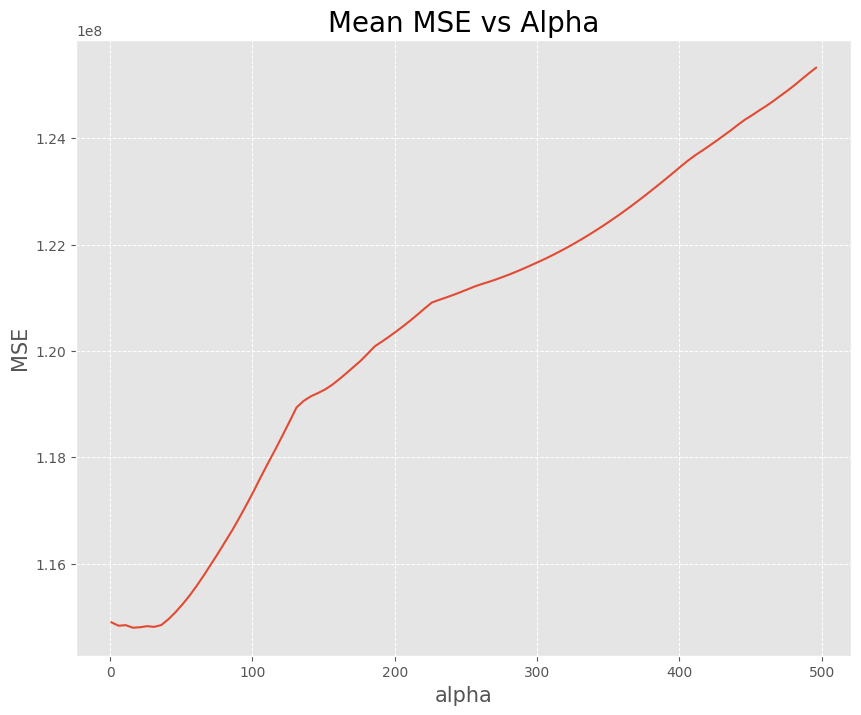

In [1009]:
plt.figure(figsize=(10, 8))
plt.plot(md.alphas_, md.mse_path_.mean(axis=1))
plt.xlabel("alpha", fontsize=15)
plt.ylabel("MSE", fontsize=15)
plt.title("Mean MSE vs Alpha", fontsize=20)
plt.grid(True, linestyle='--', linewidth=0.7)

plt.show();

In [1010]:
md.alpha_

16

In [1011]:
print("Best alpha –", md.alpha_)

lasso_coef = pd.Series(md.coef_, index=feature_names)
lasso_coef

Best alpha – 16


temperature_2m_mean           7019.125747
apparent_temperature_mean    -4249.738734
precipitation_sum            -2920.866326
rain_sum                      -430.763688
snowfall_sum                     0.000000
precipitation_hours          -4627.716766
wind_speed_10m_max            -876.147215
wind_gusts_10m_max             456.571145
cloud_cover_mean             -1520.587512
relative_humidity_2m_mean     1938.456044
daylight_duration             -280.303659
year                          1138.843792
is_holiday                   -1580.768836
lag_1                         4428.784606
lag_7                         2689.889981
lag_30                        -391.750914
rolling_7_mean               27803.016920
rolling_30_mean               4128.894843
weekday_0                     -443.066089
weekday_1                      958.030700
weekday_2                     1240.626342
weekday_3                      712.124362
weekday_4                        0.000000
weekday_5                    -4301

In [1012]:
print(md.alphas[md.mse_path_[:,0].argmin()])
print(md.alphas[md.mse_path_[:,1].argmin()])
print(md.alphas[md.mse_path_[:,2].argmin()])

436
496
86


Significantly different alphas on different folds show as we increase amount of data, models stops overfitting. 

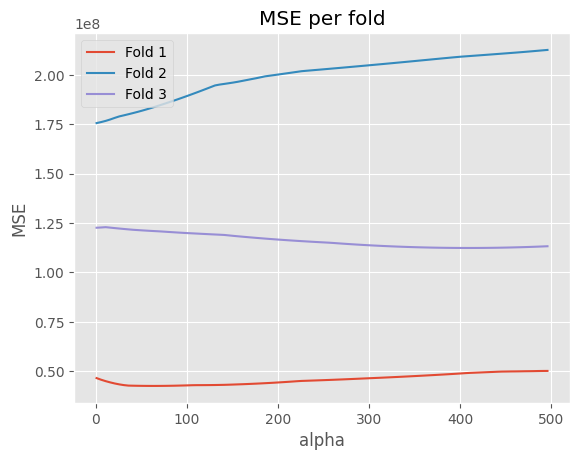

In [1013]:
for i in range(md.mse_path_.shape[1]):
    plt.plot(md.alphas_, md.mse_path_[:, i], label=f"Fold {i+1}")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("MSE per fold")
plt.legend()
plt.grid(True)
plt.show()

In [1014]:
md = Ridge(alpha = 16, max_iter=10000)
md.fit(X_train, y_train)

# Make final prediction using best model
y_pred = md.predict(X_test)

y_pred = np.maximum(y_pred, 0) # Ensure predictions are non-negative

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2


(9930.813683572636, 13392.022025648666, 0.8888989276032693)

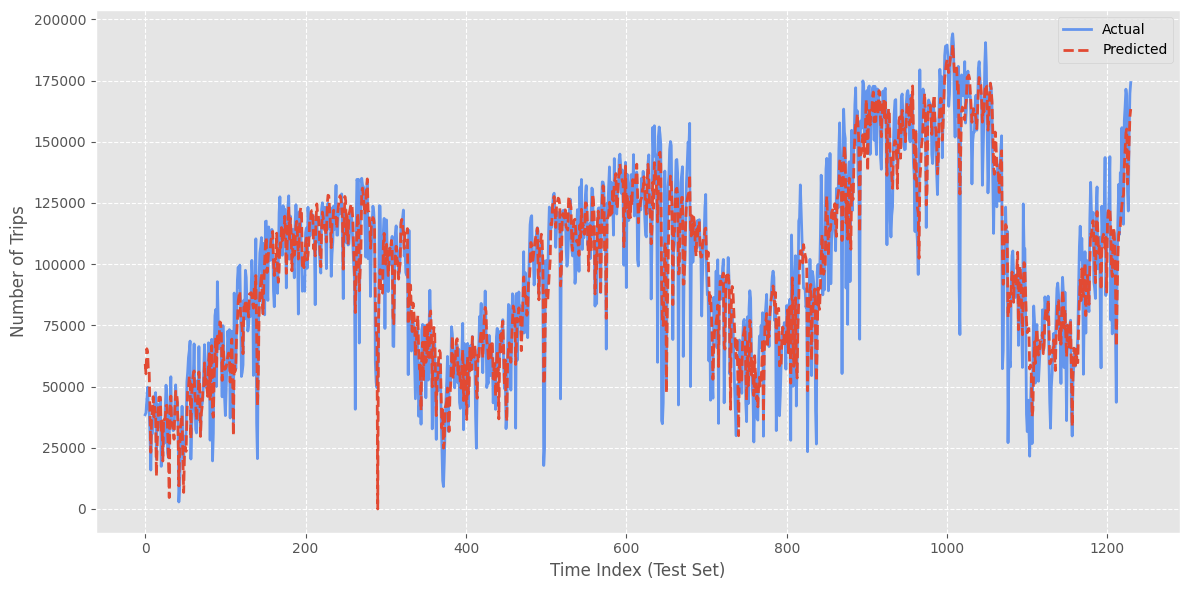

/var/folders/lf/1r0cw2qs3pq870f2x7yb20w40000gn/T/ipykernel_32479/1083040705.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([results_df.min().min(), results_df.max().max()],


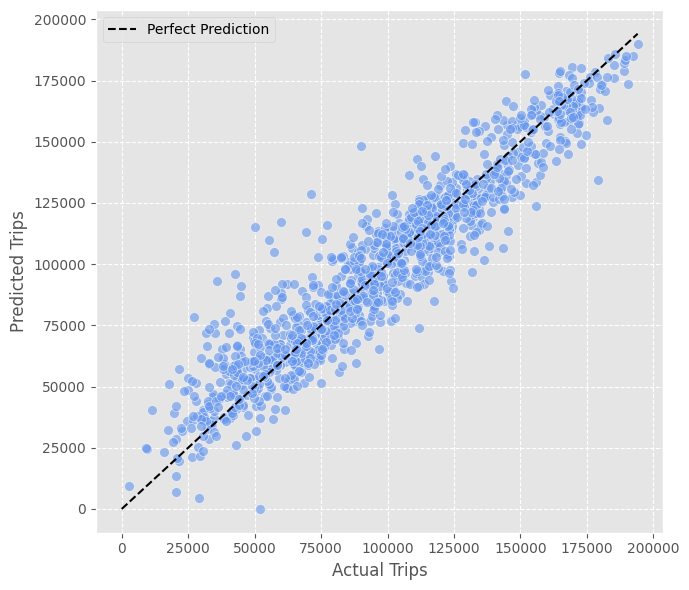

In [1015]:
results_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

# Line plot of actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(results_df["Actual"].values, label="Actual", linewidth=2, color='cornflowerblue')
plt.plot(results_df["Predicted"].values, label="Predicted", linewidth=2, linestyle='--')
#plt.title("Actual vs Predicted Number of Trips", fontsize=16)
plt.xlabel("Time Index (Test Set)", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

# Scatter plot for correlation
plt.figure(figsize=(7, 6))
sns.scatterplot(x="Actual", y="Predicted", data=results_df, alpha=0.6, color='cornflowerblue', s=50)
plt.plot([results_df.min().min(), results_df.max().max()],
         [results_df.min().min(), results_df.max().max()],
         'r--', label="Perfect Prediction", color='black')
#plt.title("Scatter Plot of Predicted vs Actual", fontsize=15)
plt.xlabel("Actual Trips", fontsize=12)
plt.ylabel("Predicted Trips", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

We see that the model predicts pretty well, but the performance metrics can be hard to capture, so let's calculate MAPE (Mean Absolute Percentage Error)

In [1016]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mape

14.485338762169263

We can conclude that the model makes an average error of 14.8%, which is a good quality as the MAE is around 10,000 trips, while we have up to 200,000 trips max per day. However, as we want forecasting to be even more precise while keeping the useful regularization approach, the Xgboost model should be considered. 

# 4. XGBoost Model

In [1017]:
import xgboost as xgb
from xgboost import cv
from sklearn.preprocessing import OneHotEncoder
from hyperopt import fmin, tpe, Trials, STATUS_OK, hp
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [1018]:
df

,date,temperature_2m_mean,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,cloud_cover_mean,...,number_of_trips,weekday,year,season,is_holiday,lag_1,lag_7,lag_30,rolling_7_mean,rolling_30_mean
30,2014-01-31,-3.331084,-7.810906,0.000000,0.000000,0.000000,0.0,12.964998,23.759998,83.958336,...,14653,4,0,1,0,12158.0,6176.0,6059.0,9900.285714,9811.366667
31,2014-02-01,0.364750,-3.376839,0.000000,0.000000,0.000000,0.0,11.885453,23.039999,90.708336,...,12771,5,0,1,0,14653.0,4338.0,8600.0,11105.000000,9950.400000
32,2014-02-02,2.979333,-0.320795,0.000000,0.000000,0.000000,0.0,11.113451,17.640000,95.125000,...,13816,6,0,1,0,12771.0,4980.0,1144.0,12367.285714,10372.800000
33,2014-02-03,0.183500,-3.830028,27.400000,0.700000,18.689999,17.0,16.946787,34.200000,86.416664,...,2600,0,0,1,0,13816.0,13119.0,2292.0,10864.571429,10383.066667
34,2014-02-04,-5.085250,-9.133952,0.000000,0.000000,0.000000,0.0,9.983106,17.280000,73.416664,...,8709,1,0,1,0,2600.0,10033.0,2678.0,10675.428571,10584.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124,2025-04-26,18.251663,17.817745,13.200001,13.200001,0.000000,18.0,21.396542,48.239998,93.791664,...,129606,5,11,2,0,168961.0,155757.0,115806.0,146727.428571,118635.933333
4125,2025-04-27,11.524585,6.710212,0.000000,0.000000,0.000000,0.0,30.356560,77.039990,51.958332,...,121701,6,11,2,0,129606.0,117664.0,121484.0,147304.142857,118643.166667
4126,2025-04-28,15.799582,13.341233,0.000000,0.000000,0.000000,0.0,12.678185,32.760002,8.708333,...,152958,0,11,2,0,121701.0,116298.0,143550.0,152541.285714,118956.766667
4127,2025-04-29,19.270414,17.037094,0.000000,0.000000,0.000000,0.0,19.334715,45.000000,56.416668,...,169718,1,11,2,0,152958.0,158681.0,87163.0,154118.000000,121708.600000


In [1019]:
X = df.drop(columns=["date", "number_of_trips"])
Y = df["number_of_trips"]

In [1020]:
X.columns

Index(['temperature_2m_mean', 'apparent_temperature_mean', 'precipitation_sum',
       'rain_sum', 'snowfall_sum', 'precipitation_hours', 'wind_speed_10m_max',
       'wind_gusts_10m_max', 'cloud_cover_mean', 'relative_humidity_2m_mean',
       'daylight_duration', 'weekday', 'year', 'season', 'is_holiday', 'lag_1',
       'lag_7', 'lag_30', 'rolling_7_mean', 'rolling_30_mean'],
      dtype='object')

In [1021]:
X["year"] = X["year"].astype('category')

In [1022]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

categorical_features = ['weekday', 'season']
numeric_features = [col for col in X.columns if col not in categorical_features]

# One-hot encode categorical
encoder = OneHotEncoder(sparse_output=False)
X_cat_encoded = encoder.fit_transform(X[categorical_features])
cat_feature_names = encoder.get_feature_names_out(categorical_features)

# Numeric data
X_num = X[numeric_features].values

# Combine and keep as DataFrame
X_processed = pd.DataFrame(
    np.hstack([X_num, X_cat_encoded]),
    columns=numeric_features + list(cat_feature_names),
    index=X.index
)


In [1023]:
X_processed

,temperature_2m_mean,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,cloud_cover_mean,relative_humidity_2m_mean,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,season_1,season_2,season_3,season_4
30,-3.331084,-7.810906,0.000000,0.000000,0.000000,0.0,12.964998,23.759998,83.958336,65.245110,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
31,0.364750,-3.376839,0.000000,0.000000,0.000000,0.0,11.885453,23.039999,90.708336,69.965850,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
32,2.979333,-0.320795,0.000000,0.000000,0.000000,0.0,11.113451,17.640000,95.125000,82.383125,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
33,0.183500,-3.830028,27.400000,0.700000,18.689999,17.0,16.946787,34.200000,86.416664,90.477080,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34,-5.085250,-9.133952,0.000000,0.000000,0.000000,0.0,9.983106,17.280000,73.416664,78.680610,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124,18.251663,17.817745,13.200001,13.200001,0.000000,18.0,21.396542,48.239998,93.791664,81.701620,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4125,11.524585,6.710212,0.000000,0.000000,0.000000,0.0,30.356560,77.039990,51.958332,53.213390,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4126,15.799582,13.341233,0.000000,0.000000,0.000000,0.0,12.678185,32.760002,8.708333,43.262264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4127,19.270414,17.037094,0.000000,0.000000,0.000000,0.0,19.334715,45.000000,56.416668,46.893066,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [1024]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.3, random_state = 0)

In [1025]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2869, 29), (1230, 29), (2869,), (1230,))

In [1026]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train, enable_categorical = True)

In [1027]:
params_1 = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
}

results = xgb.cv(params_1,
                 data_dmatrix,
                 num_boost_round = 500,
                 nfold=3,
                 metrics = ["mae","rmse"],
                 early_stopping_rounds=20,
                 seed=42)

In [1028]:
results[['test-mae-mean', 'test-rmse-mean']].tail(1)

,test-mae-mean,test-rmse-mean
86,6788.322391,9752.790518


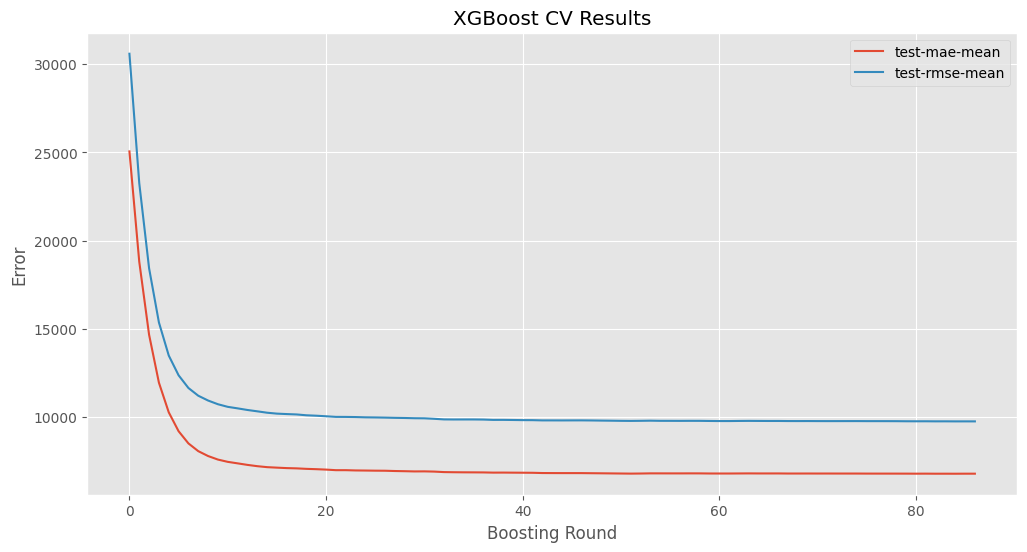

In [1029]:
results[['test-mae-mean', 'test-rmse-mean']].plot(title='XGBoost CV Results', figsize=(12, 6))
plt.xlabel('Boosting Round')
plt.ylabel('Error');

In [1030]:
def xgb_objective(space):
  results = xgb.cv(space, 
                   dtrain=data_dmatrix,
                   num_boost_round=500, 
                   nfold=5, 
                   early_stopping_rounds=20,
                   metrics = ['mae','rmse'], 
                   seed = 42, 
                   )
  
  best_score = results['test-mae-mean'].min()
  return {'loss': best_score, 'status': STATUS_OK}

In [1031]:
search_space = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',

    'learning_rate': hp.uniform("learning_rate", 0.01, 1),  
    'min_split_loss': hp.uniform("min_split_loss", 0, 10),
    'max_depth': hp.choice("max_depth", np.arange(1, 20, dtype=int)),
    'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
    'reg_lambda' : hp.uniform('reg_lambda', 0,1),
    'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),

    'colsample_bytree': hp.uniform("colsample_bytree", 0.5, 1.0),
    'colsample_bynode': hp.uniform("colsample_bynode", 0.5, 1.0),
    'colsample_bylevel': hp.uniform("colsample_bylevel", 0.5, 1.0),

    'subsample': hp.uniform("subsample", 0.1, 1.0),
    'seed': 42
}

In [1032]:
trials = Trials()

best_params = fmin(
    fn=xgb_objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials)

# Extract the best trial
best_trial = trials.best_trial

best_metric = best_trial['result']['loss']

print("Best Parameters:", best_params)
print("Best Metric (MAE):", best_metric)

100%|██████████| 100/100 [03:03<00:00,  1.83s/trial, best loss: 5911.737710421514]
Best Parameters: {'colsample_bylevel': 0.5157930738401545, 'colsample_bynode': 0.6035563320251447, 'colsample_bytree': 0.6729236083020019, 'learning_rate': 0.06639935020418807, 'max_depth': 5, 'min_child_weight': 9.0, 'min_split_loss': 6.349010365778742, 'reg_alpha': 54.0, 'reg_lambda': 0.9631780207716345, 'subsample': 0.5652485066685446}
Best Metric (MAE): 5911.737710421514


In [1033]:
best_params

{'colsample_bylevel': 0.5157930738401545,
 'colsample_bynode': 0.6035563320251447,
 'colsample_bytree': 0.6729236083020019,
 'learning_rate': 0.06639935020418807,
 'max_depth': 5,
 'min_child_weight': 9.0,
 'min_split_loss': 6.349010365778742,
 'reg_alpha': 54.0,
 'reg_lambda': 0.9631780207716345,
 'subsample': 0.5652485066685446}

In [1034]:
params = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'colsample_bylevel': 0.7108889517305835,
    'colsample_bynode': 0.6252552336544607,
    'colsample_bytree': 0.6521378259734618,
    'learning_rate': 0.0893996568060848,
    'max_depth': 4,
    'min_child_weight': 9.0,
    'min_split_loss': 0.2885646407399236,
    'reg_alpha': 112.0,
    'reg_lambda': 0.7245846043981843,
    'subsample': 0.6743602000576029, 
    'seed': 42, 
}

dmatrix_test = xgb.DMatrix(data=X_test,label=y_test, enable_categorical = True)

In [1035]:
bst = xgb.train(params, data_dmatrix, num_boost_round=500)
y_pred = bst.predict(dmatrix_test) 


In [1036]:
y_pred = np.maximum(y_pred, 0) # Ensure predictions are non-negative

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

(mae, rmse, mape)

(5890.776579321884, 8509.562923677655, 13.642719282064816)

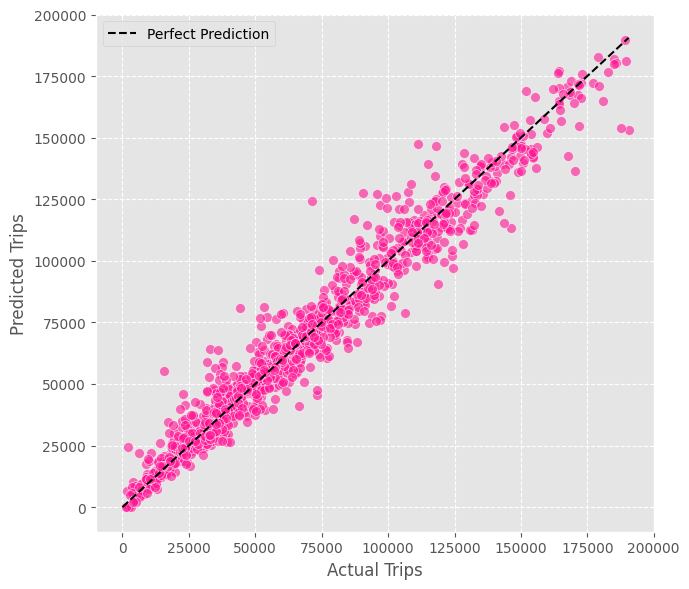

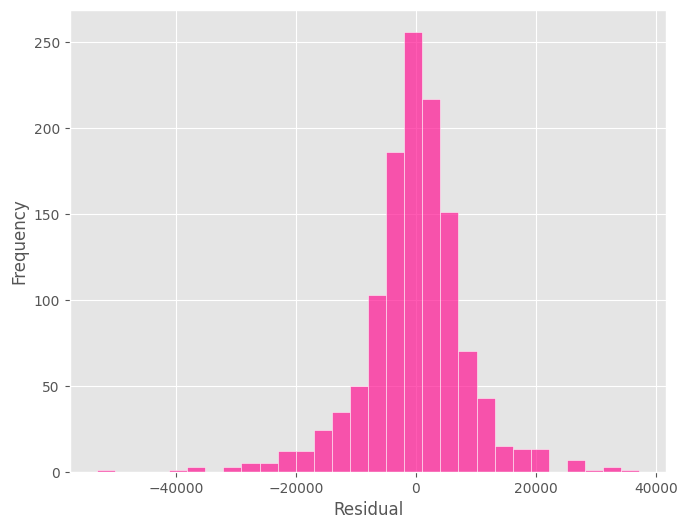

-53165.828125 37239.171875


In [1037]:
results_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
results_df["Residuals"] = results_df["Actual"] - results_df["Predicted"]

# Scatter plot for correlation
plt.figure(figsize=(7, 6))
sns.scatterplot(x="Actual", y="Predicted", data=results_df, alpha=0.6, color='deeppink', s=50)
min_val = max(0, min(results_df["Actual"].min(), results_df["Predicted"].min()))
max_val = max(results_df["Actual"].max(), results_df["Predicted"].max())

# Plot perfect prediction line only within data range
plt.plot([min_val, max_val], [min_val, max_val],
         linestyle='--', color='black', label="Perfect Prediction")

#plt.title("Scatter Plot of Predicted vs Actual for XGboost", fontsize=15)
plt.xlabel("Actual Trips", fontsize=12)
plt.xlim(-10000)
plt.ylim(-10000)
plt.ylabel("Predicted Trips", fontsize=12)

plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

# Line plot of residuals

plt.figure(figsize=(7.7, 6))
plt.hist(results_df["Residuals"], bins=30, color='deeppink', edgecolor='white', alpha=0.7)
#plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show();

print(results_df["Residuals"].min(), results_df["Residuals"].max())


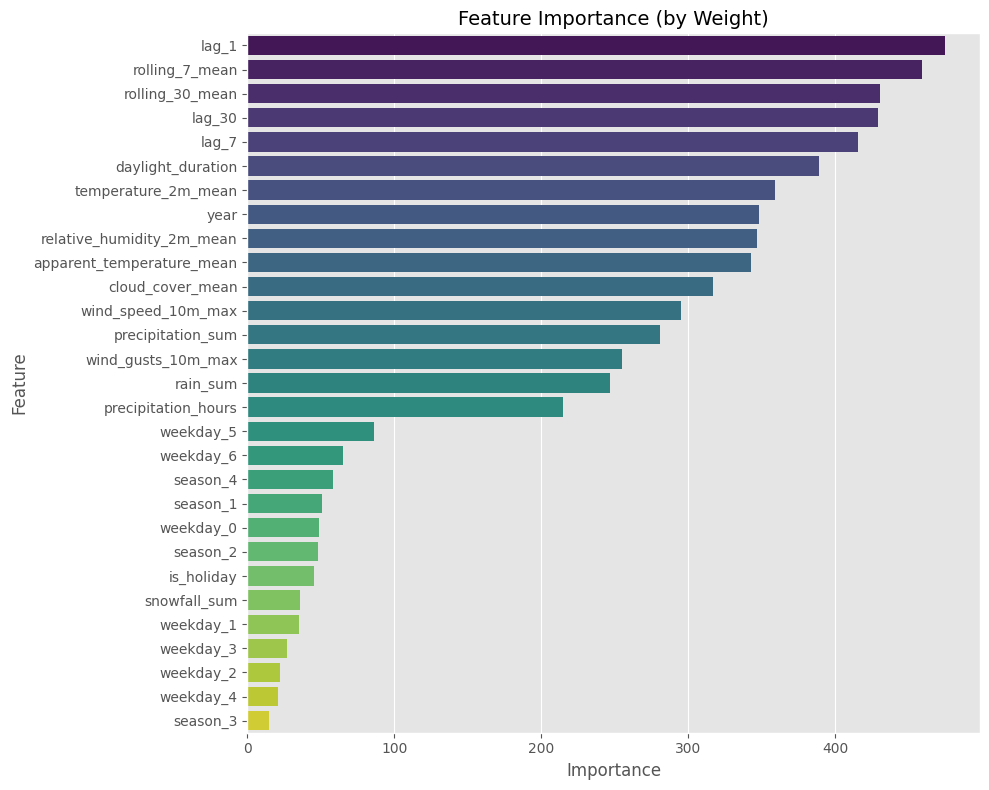

In [1038]:
# Get feature importance scores
importance = bst.get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', orient='h', hue= 'Feature')
plt.title("Feature Importance (by Weight)", fontsize=14)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


/var/folders/lf/1r0cw2qs3pq870f2x7yb20w40000gn/T/ipykernel_32479/832308331.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


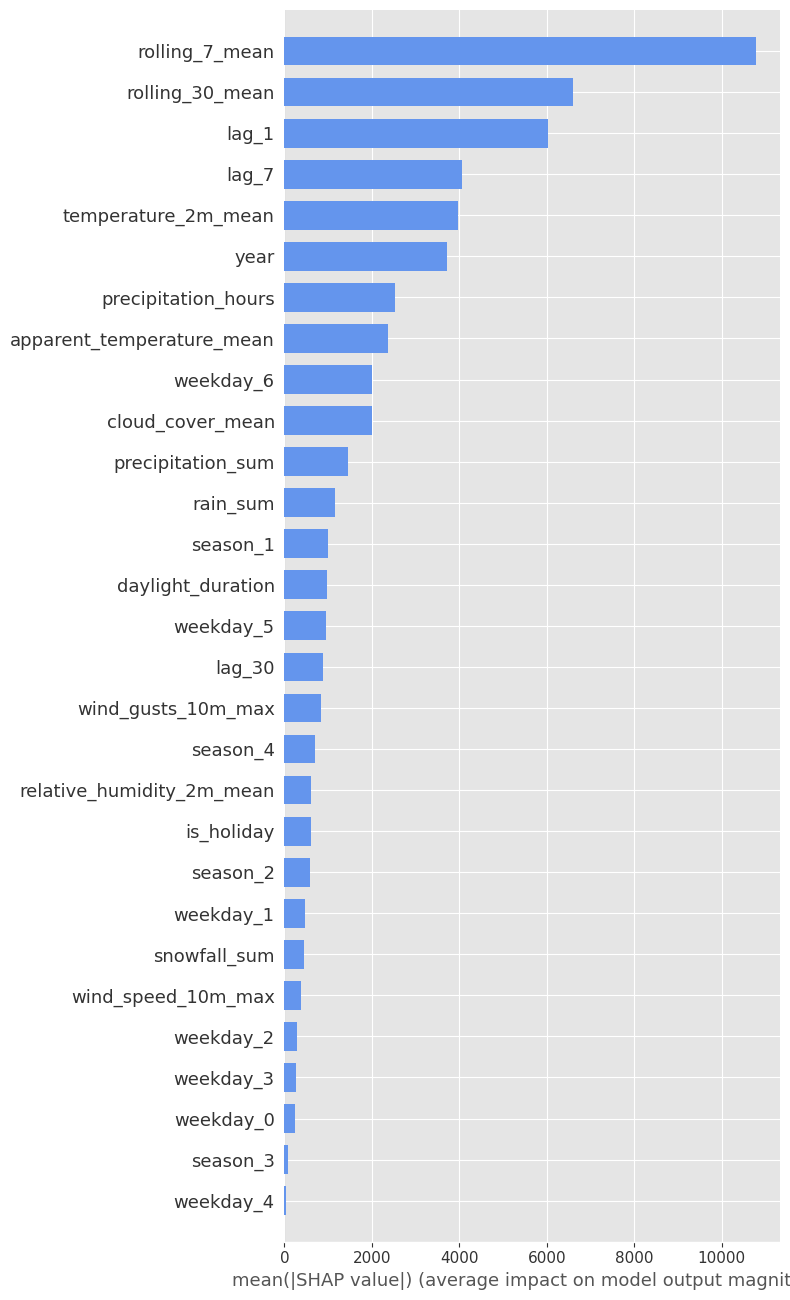

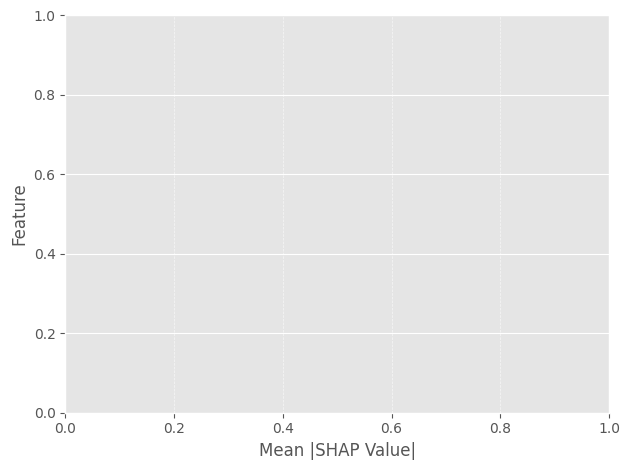

In [1039]:
import shap
import matplotlib.pyplot as plt

explainer = shap.Explainer(bst)
shap_values = explainer(X_test)

# SHAP bar summary plot
shap.summary_plot(
    shap_values,
    features=X_test,
    feature_names=X_test.columns,
    plot_type="bar",
    color='cornflowerblue',
    max_display=30
)

plt.xlabel("Mean |SHAP Value|", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

In [1040]:
bst.save_model("xgb_model.json")